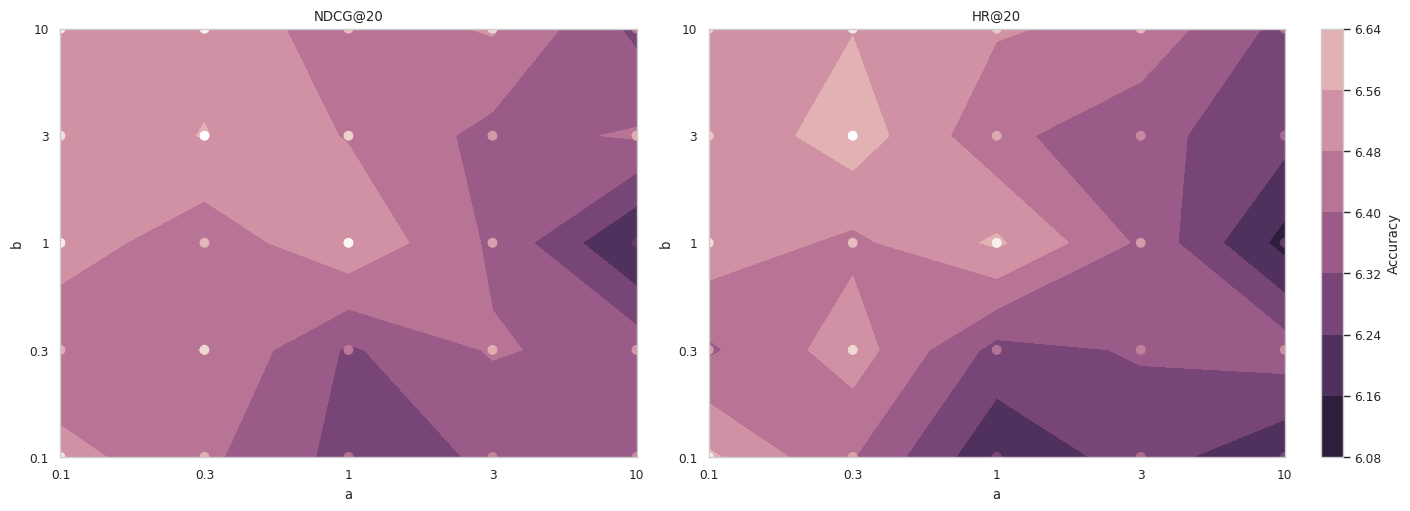

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
# 数据
a = np.linspace(0, 10, 5)  # X 轴 (超参数 a)
b = np.linspace(0, 10, 5)  # Y 轴 (超参数 b)
A, B = np.meshgrid(a, b)

# 模拟准确率值 (两个不同的 Z)
Z1 = np.array([
    2.9346, 2.8847, 2.9424, 2.9316, 2.9470,
    2.8887, 2.9216, 2.8932, 2.9617, 2.9477,
    2.8256, 2.8346, 2.9537, 2.9169, 2.8986,
    2.8439, 2.8839, 2.8733, 2.8673, 2.9240,
    2.8480, 2.8650, 2.7558, 2.8843, 2.8297
]).reshape(5, 5).transpose(1, 0)

Z2 = np.array([
    6.5739, 6.3866, 6.5304, 6.4880, 6.5139,
    6.4043, 6.5219, 6.4612, 6.6071, 6.5564,
    6.1748, 6.2932, 6.5731, 6.4200, 6.4880,
    6.2769, 6.3274, 6.3861, 6.3446, 6.4548,
    6.1745, 6.3616, 6.1304, 6.2685, 6.2934
]).reshape(5, 5).transpose(1, 0)
sns.set_context("paper")
# 创建图形和子图
fig, axes = plt.subplots(1, 2, figsize=(14, 5), constrained_layout=True)  # 创建两幅子图

# 数据点
data_points_a = [0, 2.5, 5, 7.5, 10]  # 示例点的 a 值
data_points_b = [0, 2.5, 5, 7.5, 10]  # 示例点的 b 值
A1, B1 = np.meshgrid(data_points_a, data_points_b)

# Z 数据列表
Z_list = [Z1, Z2]
titles = ["NDCG@20", "HR@20"]  # 子图标题
rocket_cmap = sns.color_palette("rocket", as_cmap=True)
# 截取右半部分，假设我们要截取后 50% 的颜色
new_cmap = rocket_cmap(np.linspace(0, 0.8, 50))  # 从 50% 到 100%

# 创建一个新的 LinearSegmentedColormap
rocket_cmap = LinearSegmentedColormap.from_list("rocket_right", new_cmap)
cmap=sns.cubehelix_palette(as_cmap=True,reverse=True,light=0.8,dark=0.1)
cmap1=sns.cubehelix_palette(as_cmap=True,reverse=True,light=1,dark=0.3)
# cmap=sns.color_palette("husl",as_cmap=True)
# 绘制每个子图
for i, ax in enumerate(axes):
    # 绘制等高线图
    contour = ax.contourf(A, B, Z_list[i], levels=5, cmap=cmap)
    
    # 在图中叠加数据点
    ax.scatter(A1, B1,c=Z_list[i], cmap=cmap1, s=40)

    # 设置轴标签和标题
    ax.set_xlabel("a")
    ax.set_ylabel("b")
    ax.set_title(titles[i])
    ax.set_xticks([0, 2.5, 5, 7.5, 10])
    ax.set_xticklabels(['0.1', '0.3', '1', '3', '10'])
    ax.set_yticks([0, 2.5, 5, 7.5, 10])
    ax.set_yticklabels(['0.1', '0.3', '1', '3', '10'])
fig.colorbar(contour, ax=ax, location='right', label='Accuracy')
plt.savefig(f'../imgs/beta_schedule.pdf', dpi=300,bbox_inches='tight')
# 显示图像
plt.show()
plt.close()